In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from extra_functions.functions import visualize, kde_by_category

In [2]:
alijah_data_url = 'https://raw.githubusercontent.com/oconnoag/NHANES_Data/master/compiled_data/alijah_compiled_raw.csv'
raw_data = pd.read_csv(alijah_data_url)

## Column Renaming

In [3]:
processed_data_a = raw_data.copy()

In [4]:
processed_data_b = processed_data_a.rename(columns={'HSD010': 'general_health',
                                                    'LBXTST': 'testosterone',
                                                    'LBXEST': 'estradiol',
                                                    'LBXSHBG': 'sex_hormone_binding_globulin',
                                                    'LBXGH': 'glycohemoglobin',
                                                    'LBXSBU': 'blood_urea_nitrogen',
                                                    'LBXSC3SI': 'bicarbonate',
                                                    'LBXSCA': 'calcium',
                                                    'LBXSCH': 'cholesterol',
                                                    'LBXSCLSI': 'chloride', 
                                                    'LBXSGL': 'glucose',
                                                    'LBXSIR': 'iron',
                                                    'LBXSKSI': 'potassium',
                                                    'LBXSNASI': 'sodium',
                                                    'LBXSTP': 'total_protein',
                                                    'LBXSTR': 'triglycerides',
                                                    'LBXSUA': 'uric_acid'})

## Cleaning Data

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6744 entries, 0 to 6743
Data columns (total 18 columns):
SEQN        6744 non-null float64
HSD010      6166 non-null float64
LBXTST      6235 non-null float64
LBXEST      6186 non-null float64
LBXSHBG     6039 non-null float64
LBXGH       6326 non-null float64
LBXSBU      6255 non-null float64
LBXSC3SI    6257 non-null float64
LBXSCA      6257 non-null float64
LBXSCH      6254 non-null float64
LBXSCLSI    6257 non-null float64
LBXSGL      6257 non-null float64
LBXSIR      6253 non-null float64
LBXSKSI     6257 non-null float64
LBXSNASI    6257 non-null float64
LBXSTP      6253 non-null float64
LBXSTR      6254 non-null float64
LBXSUA      6254 non-null float64
dtypes: float64(18)
memory usage: 948.5 KB


In [6]:
processed_data = processed_data_b.copy()

In [7]:
# Drop any subject that did not have a particular lab test performed
processed_data = processed_data.dropna()

In [8]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5503 entries, 0 to 6743
Data columns (total 18 columns):
SEQN                            5503 non-null float64
general_health                  5503 non-null float64
testosterone                    5503 non-null float64
estradiol                       5503 non-null float64
sex_hormone_binding_globulin    5503 non-null float64
glycohemoglobin                 5503 non-null float64
blood_urea_nitrogen             5503 non-null float64
bicarbonate                     5503 non-null float64
calcium                         5503 non-null float64
cholesterol                     5503 non-null float64
chloride                        5503 non-null float64
glucose                         5503 non-null float64
iron                            5503 non-null float64
potassium                       5503 non-null float64
sodium                          5503 non-null float64
total_protein                   5503 non-null float64
triglycerides                

## Data Exploration

#### General Health Distribution

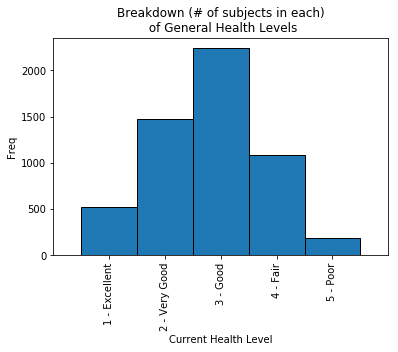

In [46]:
processed_data['general_health'].hist(grid=False, bins=np.arange(0,7,1)-0.5, ec='k')
plt.xlim([0,6])
plt.title('Breakdown (# of subjects in each)\n of General Health Levels')
plt.ylabel("Freq")
plt.xlabel("Current Health Level")
plt.xticks(np.arange(1,6), ['1 - Excellent', '2 - Very Good', '3 - Good', '4 - Fair', '5 - Poor'],
          rotation=90);

### Feature Selection/Culling

In [10]:
print("Mean by reported health level:")
display(processed_data.groupby('general_health').mean())
print('\n')
print("Standard Deviation by reported health level:")
processed_data.groupby('general_health').std()

Mean by reported health level:


,SEQN,testosterone,estradiol,sex_hormone_binding_globulin,glycohemoglobin,blood_urea_nitrogen,bicarbonate,calcium,cholesterol,chloride,glucose,iron,potassium,sodium,total_protein,triglycerides,uric_acid
general_health,,,,,,,,,,,,,,,,,
1.0,88650.736243,260.033795,114.785643,65.573491,5.440987,13.741935,24.611006,9.429222,180.851992,103.451613,92.764706,85.698292,3.968558,138.884250,7.178178,120.601518,5.146300
2.0,88807.004762,227.253170,84.003008,63.599850,5.500680,13.965986,24.411565,9.406122,184.117007,103.343537,95.736054,84.051701,3.961816,138.721088,7.183537,127.844898,5.203265
3.0,88669.231010,212.660737,85.921147,58.623530,5.715505,14.046470,24.428954,9.371001,188.300715,103.428954,101.573727,80.497766,3.942413,138.790885,7.200045,153.021001,5.408356
4.0,88762.909594,198.025720,40.704365,54.229769,6.167343,14.970480,24.440959,9.347140,188.862546,103.062731,115.285055,76.527675,3.956771,138.480627,7.224631,165.987085,5.533579
5.0,88260.842391,178.419402,30.924924,57.595978,6.534783,16.201087,24.157609,9.360870,182.798913,102.978261,125.711957,67.657609,3.998478,138.293478,7.175000,176.092391,5.534239




Standard Deviation by reported health level:


,SEQN,testosterone,estradiol,sex_hormone_binding_globulin,glycohemoglobin,blood_urea_nitrogen,bicarbonate,calcium,cholesterol,chloride,glucose,iron,potassium,sodium,total_protein,triglycerides,uric_acid
general_health,,,,,,,,,,,,,,,,,
1.0,2900.659413,261.655919,890.316277,64.943437,0.617912,4.375638,2.005343,0.343074,40.231423,2.460531,25.347952,35.974828,0.330139,1.877392,0.408370,93.625400,1.290570
2.0,2882.676071,246.851098,595.214667,52.442025,0.745351,4.899695,2.082048,0.335920,41.031707,2.713393,28.791398,34.816744,0.328729,2.025643,0.444696,94.005810,1.316230
3.0,2838.005719,237.837561,649.198642,49.438695,0.968210,5.238145,2.118126,0.348243,42.679313,2.779982,35.974718,33.617823,0.320443,2.069440,0.459767,139.269401,1.415306
4.0,2850.867975,225.276772,82.973751,36.699891,1.548801,7.231245,2.344562,0.357225,45.368711,3.031953,55.680686,34.325827,0.354041,2.337734,0.462392,122.408048,1.549187
5.0,2959.972471,233.655279,48.061584,37.492429,1.719349,8.840901,2.728547,0.390308,44.502321,3.676772,69.798842,31.167924,0.369038,2.535165,0.531751,128.743941,1.679927


#### Correlates with general_health
with a marked threshold of |0.05| correlation coefficient (Pearson's r) with general_health <br>

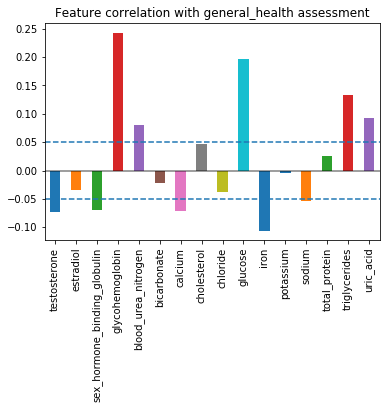

In [11]:
(processed_data.corr()['general_health'][2:]).plot.bar()
plt.axhline(y = 0.05, linestyle='--')
plt.axhline(y=0, linestyle='-', color='k', alpha=0.5)
plt.axhline(y = -0.05, linestyle='--')
plt.title("Feature correlation with general_health assessment");

In [12]:
corr_df = pd.DataFrame(processed_data.corr()['general_health'][2:]).abs().sort_values(by='general_health', 
                                                                           ascending=False)
display(corr_df)

,general_health
glycohemoglobin,0.242788
glucose,0.196994
triglycerides,0.133174
iron,0.105885
uric_acid,0.092814
blood_urea_nitrogen,0.080390
testosterone,0.073950
calcium,0.070835
sex_hormone_binding_globulin,0.070255
sodium,0.053811


## Analyze features that correlate with general_health
- Keeping only the features that make the |0.05| correlation-coefficient threshold for correlating with general_health (see the corr_df above)

In [13]:
correlating_features = list(corr_df[corr_df['general_health'] > 0.05].index)
print("Features to keep are:", correlating_features)
selected_features = processed_data[['general_health'] + correlating_features]
selected_features.head()

Features to keep are: ['glycohemoglobin', 'glucose', 'triglycerides', 'iron', 'uric_acid', 'blood_urea_nitrogen', 'testosterone', 'calcium', 'sex_hormone_binding_globulin', 'sodium']


,general_health,glycohemoglobin,glucose,triglycerides,iron,uric_acid,blood_urea_nitrogen,testosterone,calcium,sex_hormone_binding_globulin,sodium
0,3.0,7.0,94.0,158.0,70.0,4.2,13.0,367.00,9.8,42.86,136.0
1,2.0,5.5,94.0,170.0,161.0,7.0,10.0,505.00,9.8,29.04,140.0
2,4.0,5.8,103.0,299.0,72.0,7.3,26.0,104.00,9.7,27.02,140.0
3,3.0,5.6,63.0,93.0,43.0,5.4,13.0,41.00,8.9,62.77,141.0
5,3.0,5.9,97.0,52.0,75.0,4.9,25.0,5.55,9.3,55.08,140.0


## Visualizing Individual Columns with general_health

#### Glycohemoglobin
- Noticeable trend of higher glycohemoglobin levels correlating with lower-perception of general health
- Each group of general_health looks roughly normal in glycohemoglobin distribution, however, long right tails do seem to be present

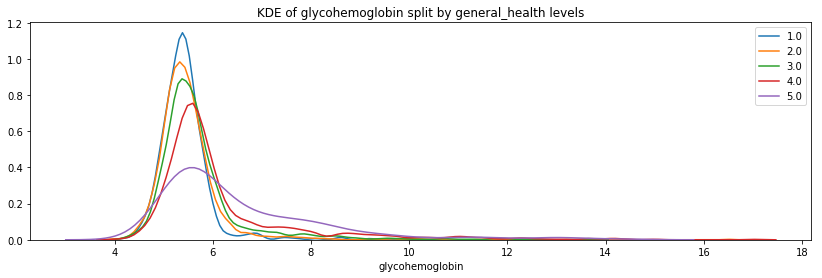

In [30]:
kde_by_category(selected_features, 'general_health', 'glycohemoglobin')

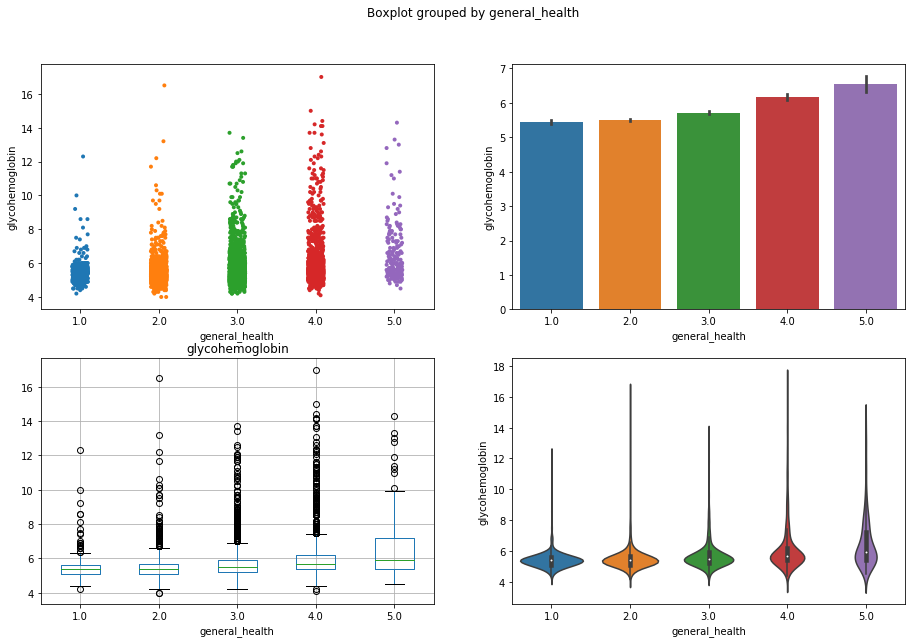

In [14]:
visualize(selected_features, 'general_health', 'glycohemoglobin')

#### Glucose
- Noticeable trend of higher glucose levels correlating with lower-perception of general health
- Fair amount of variance in 'poor' category
- Roughly normally distributed (long right tails)
- Possible outliers present?

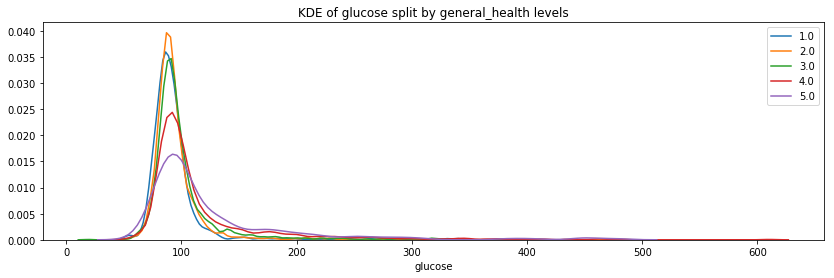

In [32]:
kde_by_category(selected_features, 'general_health', 'glucose')

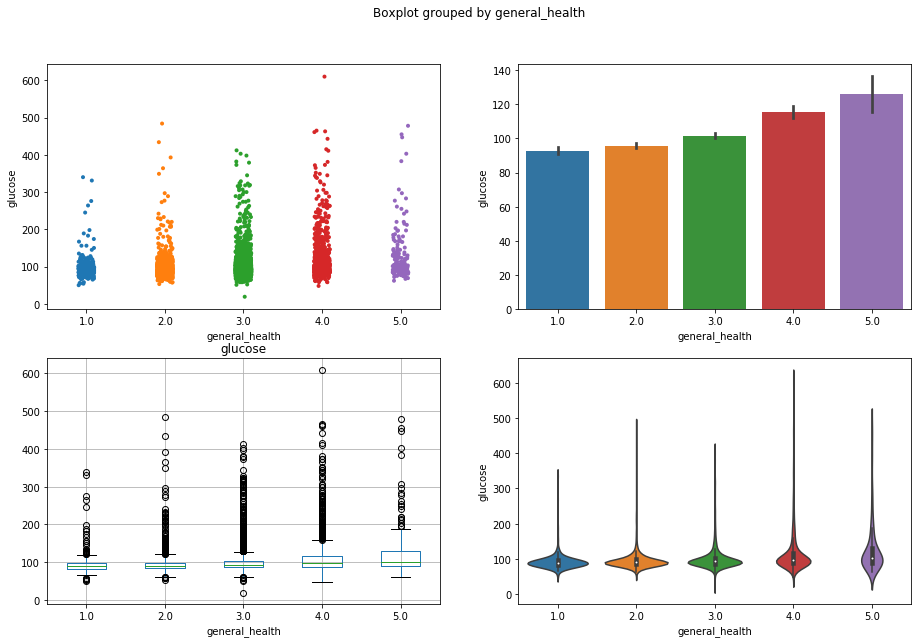

In [15]:
visualize(selected_features, 'general_health', 'glucose')

#### Triglycerides
- Noticeable trend of higher triglycerides levels correlating with lower-perception of general health
- Fair amount of variance in this data
- Roughly normally distributed, except levels 4 and 5 seem to have a small secondary peak just under 500 units (possibly bimodal)
- Possible outliers present?

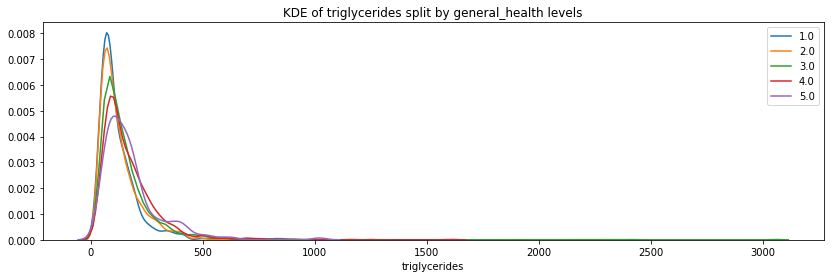

In [33]:
kde_by_category(selected_features, 'general_health', 'triglycerides')

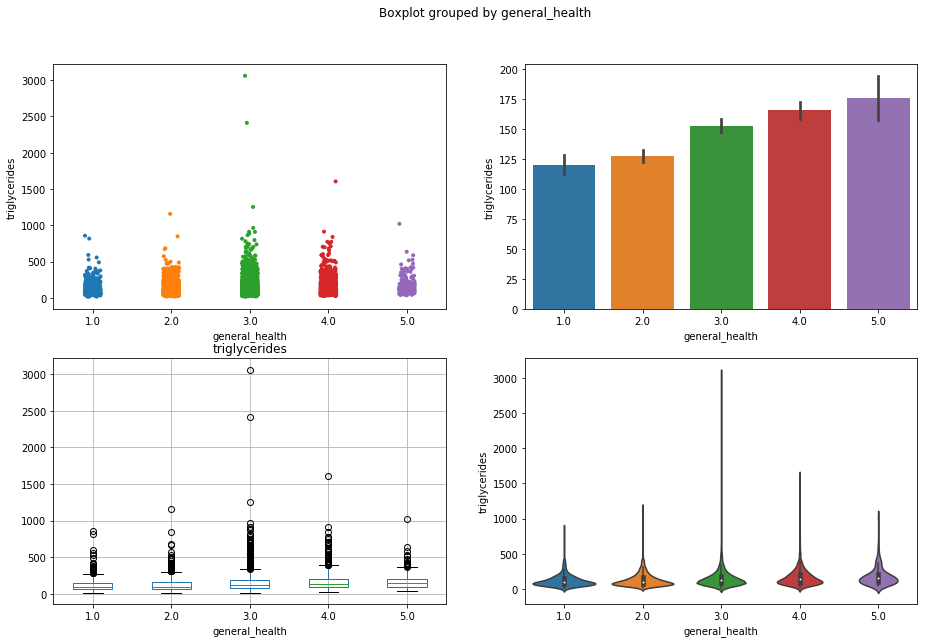

In [16]:
visualize(selected_features, 'general_health', 'triglycerides')

#### Iron
- Noticeable trend of lower iron levels correlating with lower-perception of general health
- Distributions look roughly normal
- Fair amount of variance for the poor health category

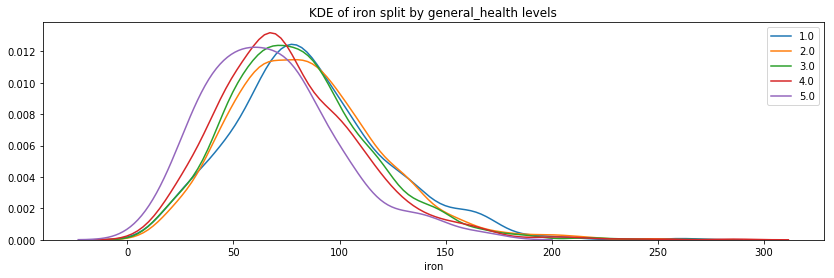

In [34]:
kde_by_category(selected_features, 'general_health', 'iron')

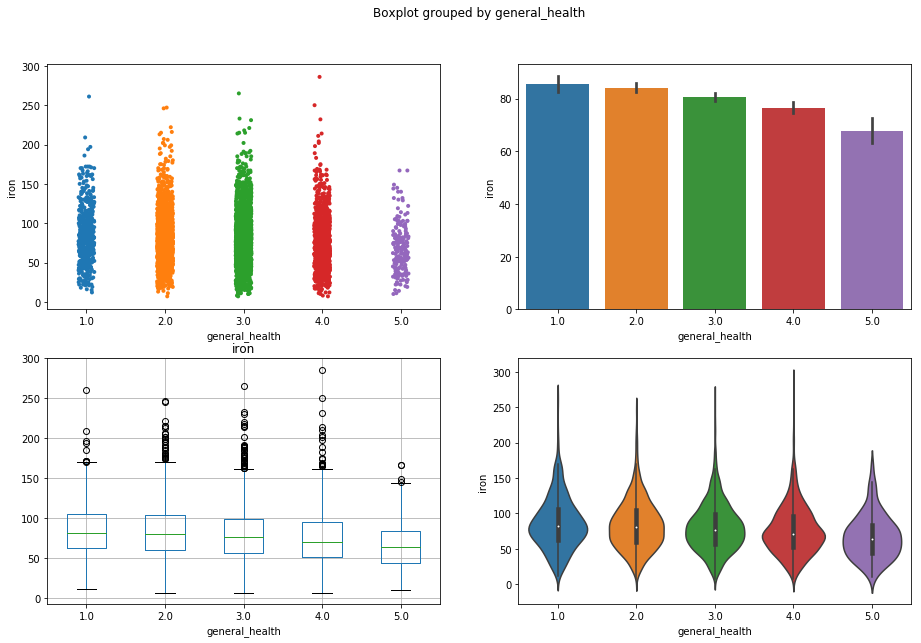

In [17]:
visualize(selected_features, 'general_health', 'iron')

#### Uric Acid
- Noticeable trend of higher uric acid levels correlating with lower-perception of general health
- Roughly normal (long right tail)
- Fair amount of variance in this data (particularly the 'poor' category)

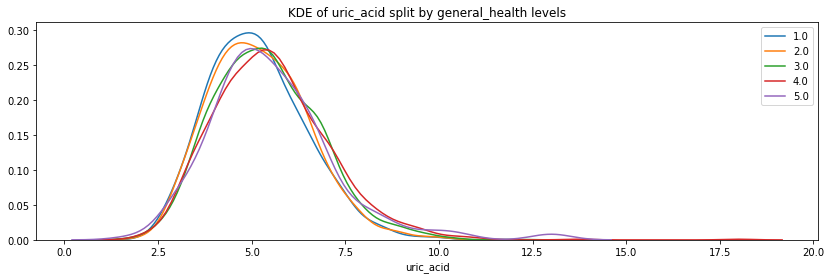

In [35]:
kde_by_category(selected_features, 'general_health', 'uric_acid')

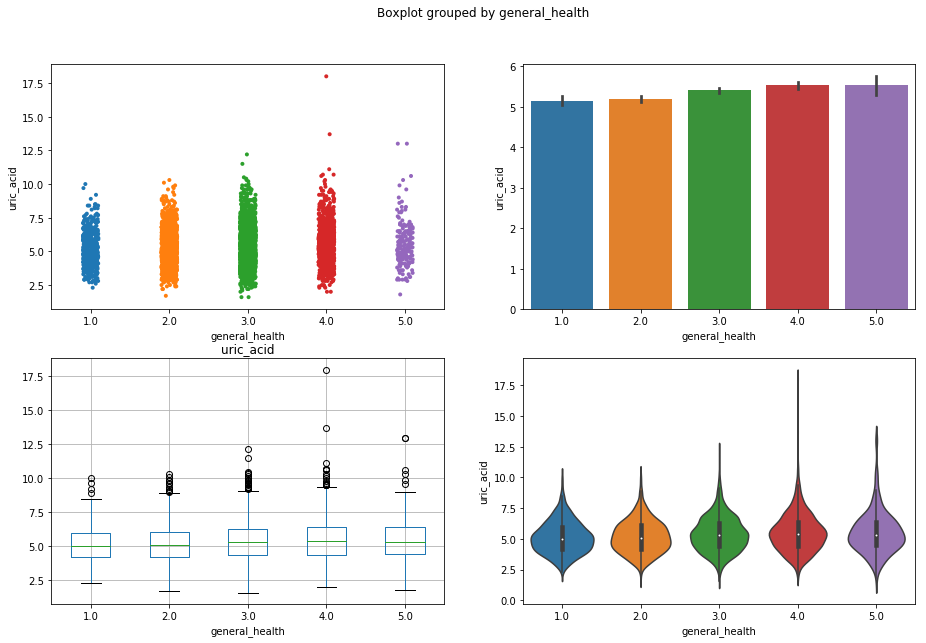

In [18]:
visualize(selected_features, 'general_health', 'uric_acid')

#### Blood Urea Nitrogen
- Noticeable trend of higher Blood-Urea-Nitrogen levels correlating with lower-perception of general health
- Roughly normal; however, levels 4 and 5 appear to auxilliary peaks (and long right tails on all)
- Fair amount of variance in this data (particularly the 'poor' category)

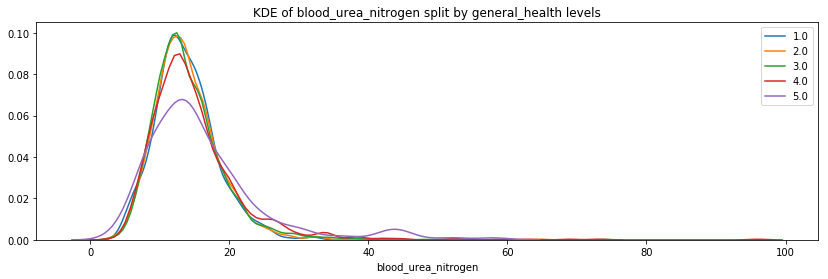

In [36]:
kde_by_category(selected_features, 'general_health', 'blood_urea_nitrogen')

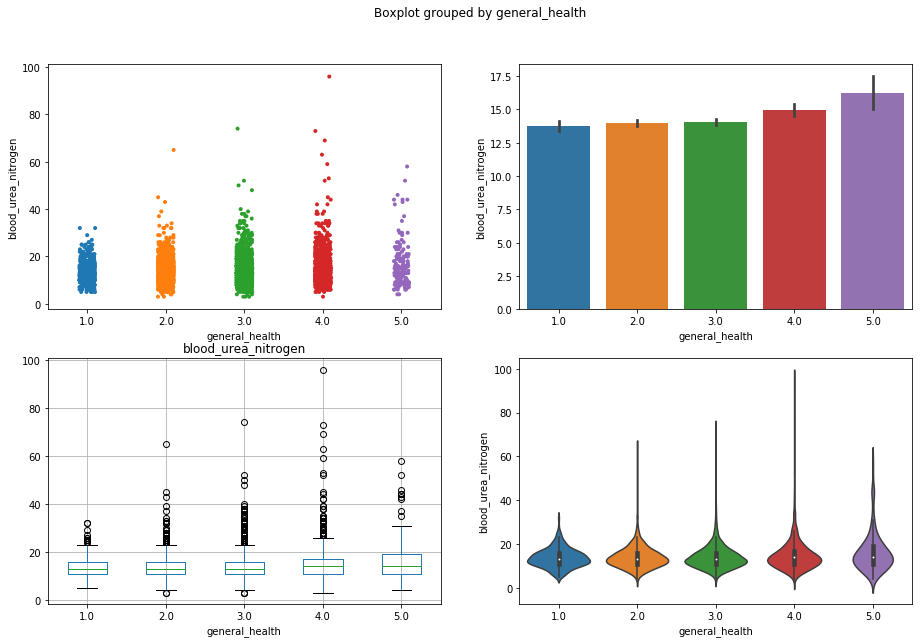

In [19]:
visualize(selected_features, 'general_health', 'blood_urea_nitrogen')

#### Testosterone
- Noticeable trend of lower testerone levels correlating with lower-perception of general health
- Bimodal distribution, both which seem to be normal by themselves.
- Fair amount of variance in this data as a whole
- Possible outliers?

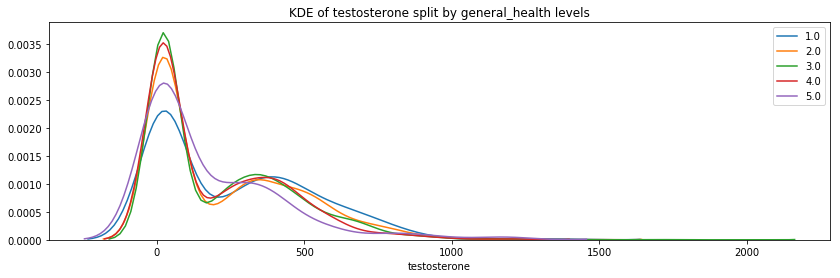

In [21]:
kde_by_category(selected_features, 'general_health', 'testosterone')

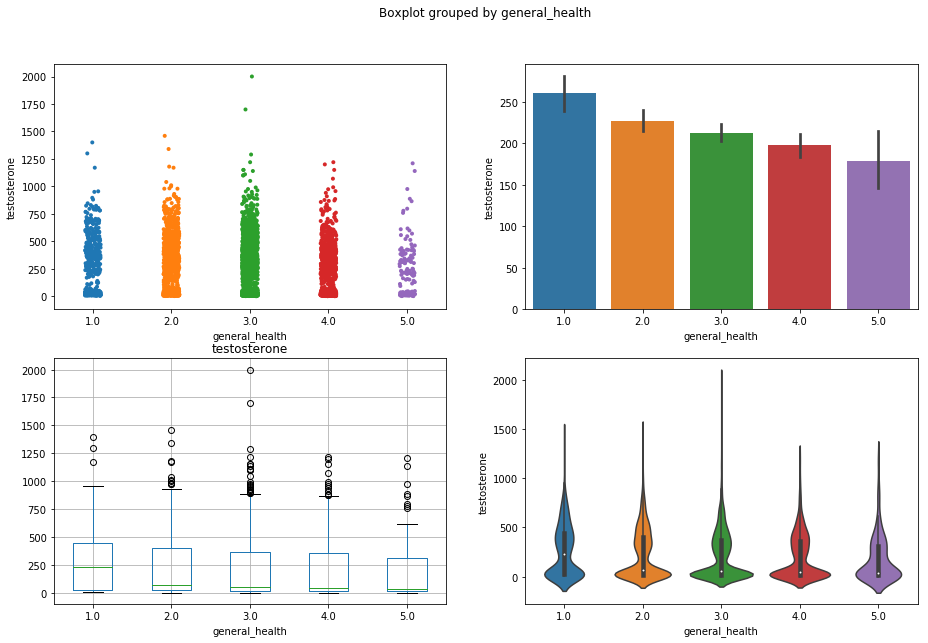

In [22]:
visualize(selected_features, 'general_health', 'testosterone')

#### Calcium
- Statistical trend of lower calcium levels correlating with lower-perception of general health
    - May be difficult to visualize because the variance in the data is much smaller than the variances of other features 
- Roughly normal distributions

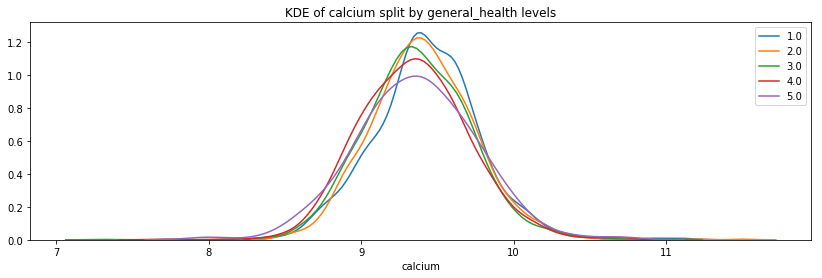

In [37]:
kde_by_category(selected_features, 'general_health', 'calcium')

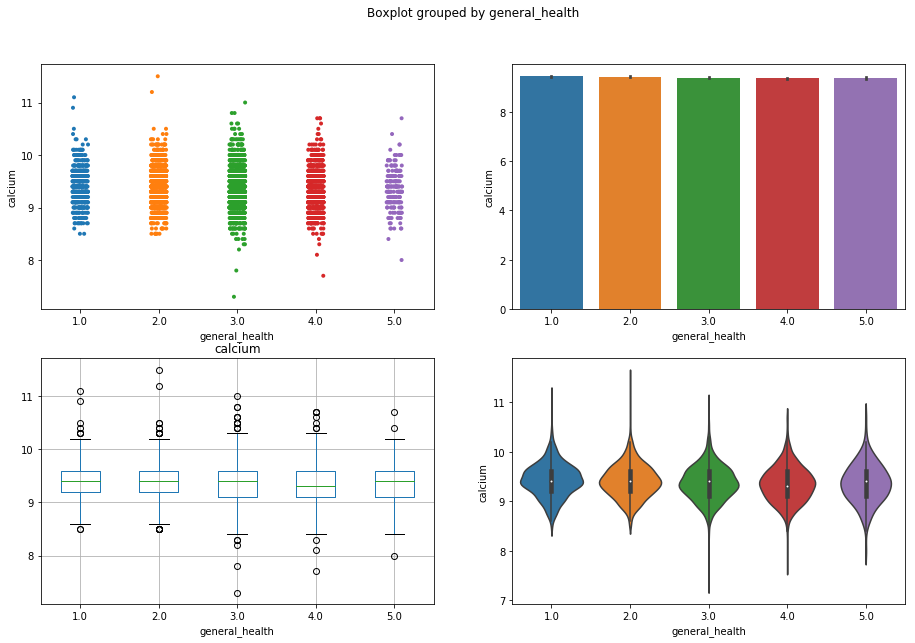

In [23]:
visualize(selected_features, 'general_health', 'calcium')

#### Sex Hormone Binding Globulin
- Fair amount of variance in this data (particularly the 'exellent' and 'poor' categories)
- Overall trend appears to be lower SHBG, lower perception of general health; however, the uptick in SHBG for the 'poor' category may lead to this feature not being as helpful in the models
- Roughly normal distributions (long right tails)

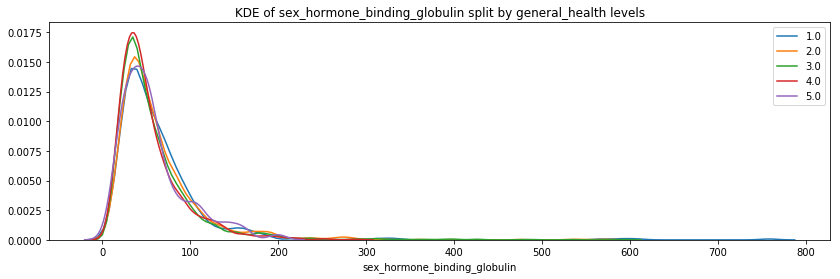

In [38]:
kde_by_category(selected_features, 'general_health', 'sex_hormone_binding_globulin')

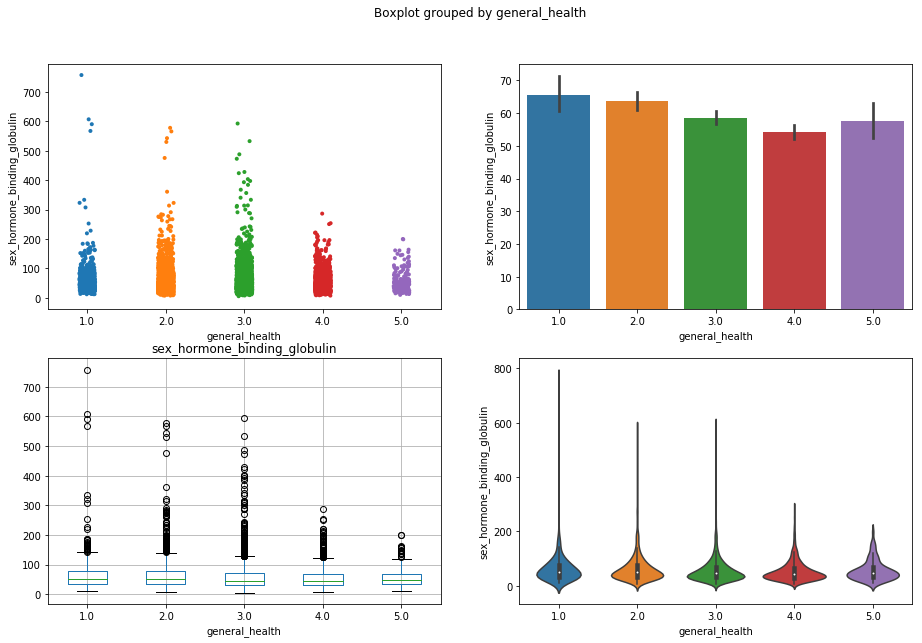

In [24]:
visualize(selected_features, 'general_health', 'sex_hormone_binding_globulin')

#### Sodium
- Similar visual result to the calicum data -- there is very little variance in this data as a whole, so it difficult to see the trends by eye; however, there is a statistical trend that lower sodium levels correlate with lower perceptions of general health.
- Possible outliers (both above and below CIs)?
- Clearly something is different the general_health level 1-3 sodium distributions -- they all still look roughly normal if the spikes are smoothed out; could these patterns be caused by measurements only be taken to a particular signifcant digit (thus making the data, sort of discrete in a way?)

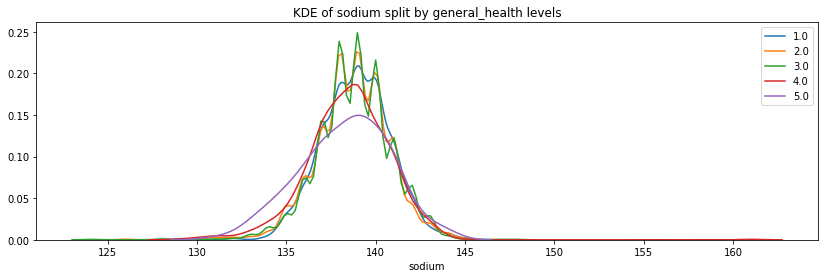

In [39]:
kde_by_category(selected_features, 'general_health', 'sodium')

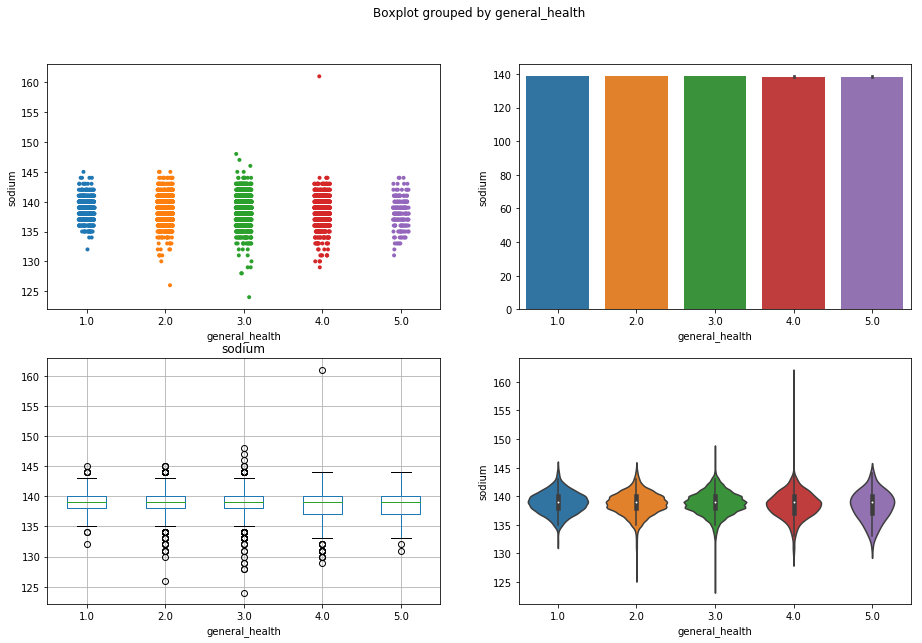

In [25]:
visualize(selected_features, 'general_health', 'sodium')

In [26]:
selected_features.columns

Index(['general_health', 'glycohemoglobin', 'glucose', 'triglycerides', 'iron',
       'uric_acid', 'blood_urea_nitrogen', 'testosterone', 'calcium',
       'sex_hormone_binding_globulin', 'sodium'],
      dtype='object')

## Any Colinearity?
** All Correlation Coefficients presented are Pearson's r ** <br>
The most concerning trends:
- Glucose and Glycohemoglobin are highly correlated (.79)
- Uric acid is correlated with a number of other features (including nearly |0.30| for blood_urea_nitrogen, SHBG, and testosterone
- Testosterone is correlated with iron at .29
- Triglycerides are correlated with Glucose and Glycohemoglib at ~0.2

#### Pairplot of variables meeting the 0.05 correlation threshold

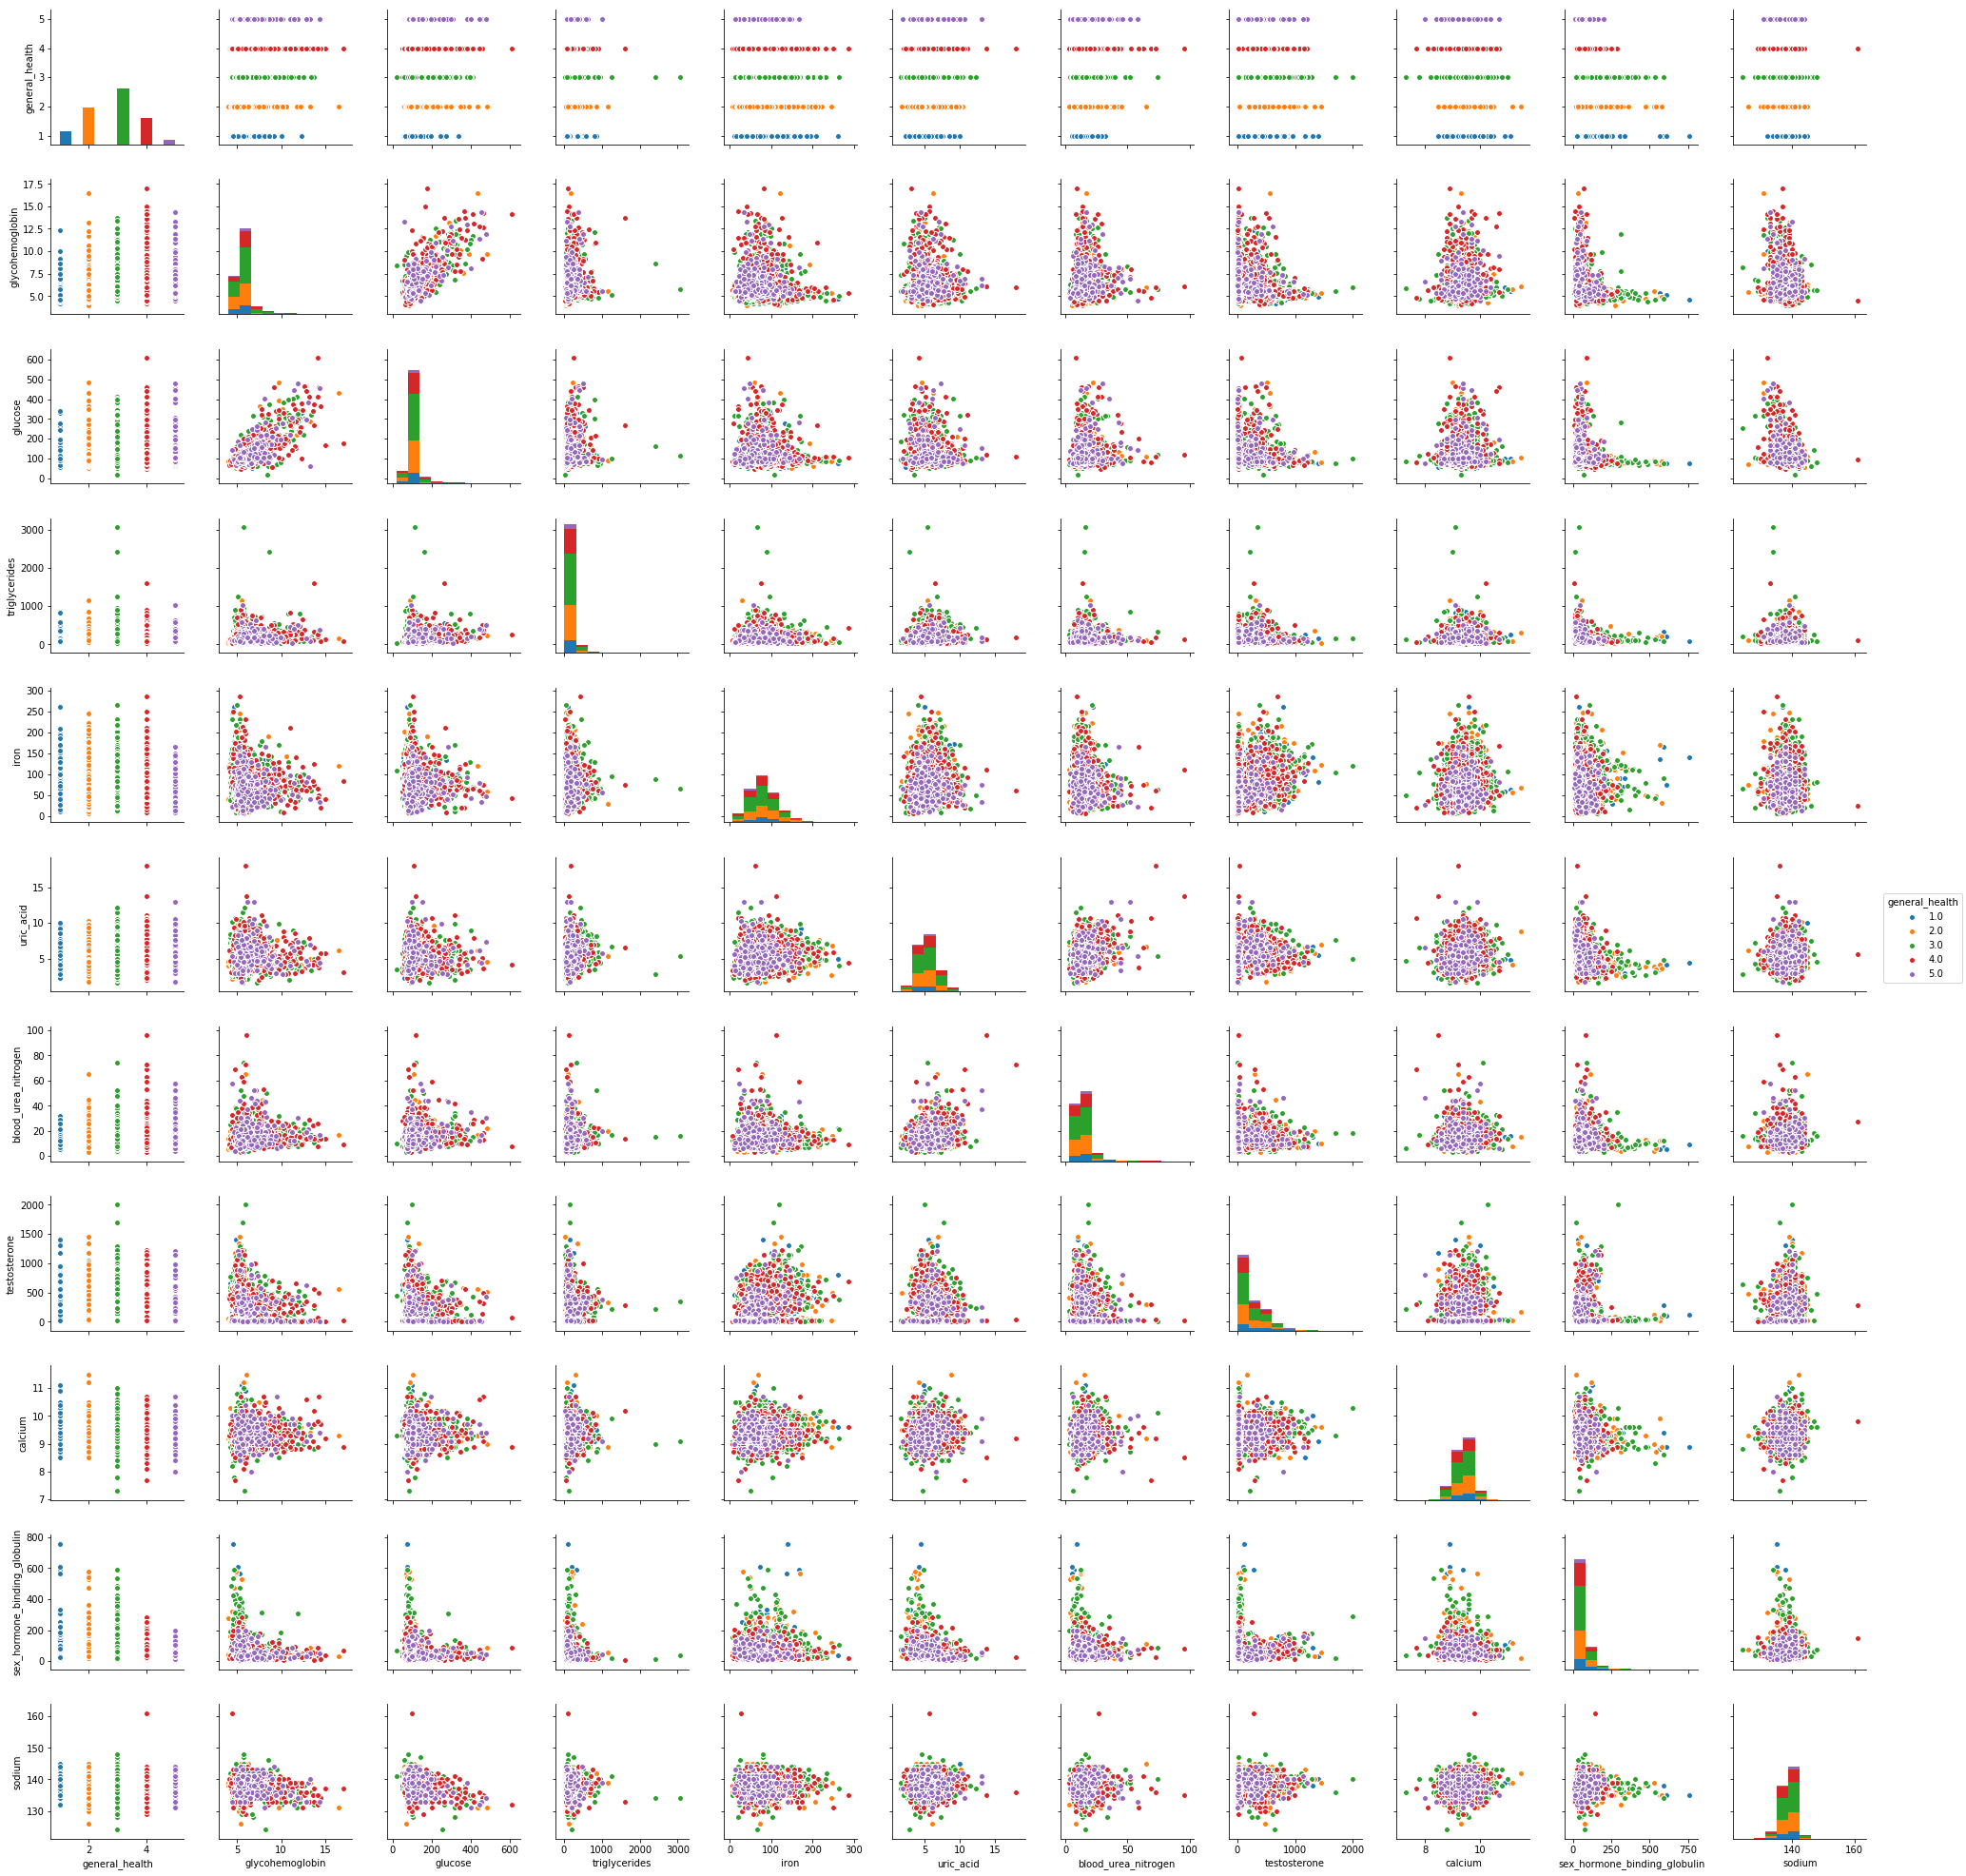

In [27]:
sns.pairplot(selected_features, hue='general_health', )

#### Heatmap

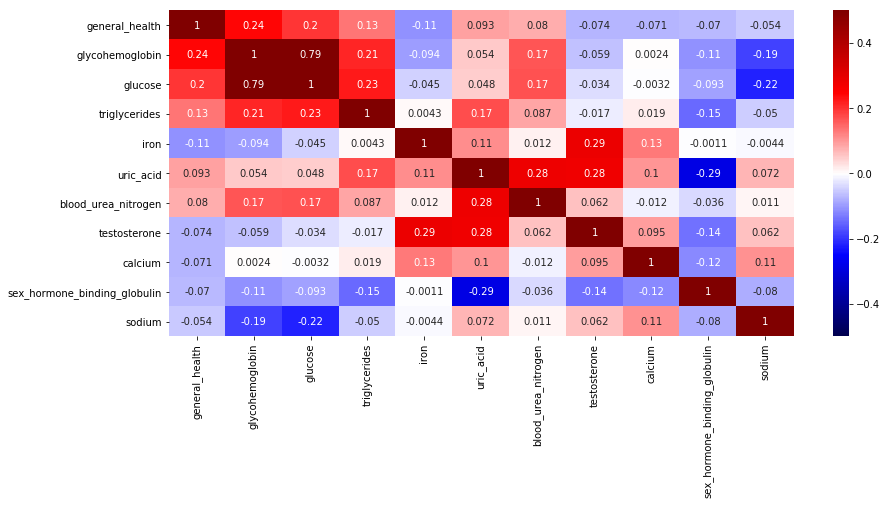

In [54]:
plt.figure(figsize=(14,6))
sns.heatmap(data=selected_features.corr(), vmin=-.5, vmax=.5, cmap='seismic', annot=True)